Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10]


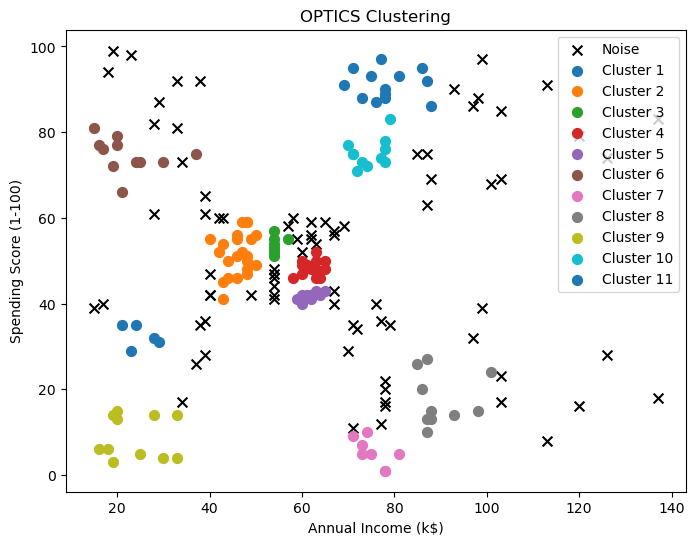

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS

# Load your dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Select features for clustering (Annual Income & Spending Score)
X = dataset.iloc[:, [3, 4]].values

# Apply OPTICS
# tune min_samples & xi/clust_method for better results
optics = OPTICS(min_samples=5,xi=0.05)
optics.fit(X)

# Get cluster labels
labels = optics.labels_
print("Cluster labels:", np.unique(labels))

# Add cluster labels to dataset
dataset['Cluster'] = labels

# Plot clusters with legend
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
for cluster in unique_labels:
    if cluster == -1:
        # Noise points
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1],
                    c='black', marker='x', s=50, label='Noise')
    else:
        # Cluster points
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1],
                    s=50, label=f'Cluster {cluster+1}')

plt.title("OPTICS Clustering")
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend()
plt.show()

In [ ]:
Key Parameters to Tune in OPTICS
min_samples
Controls density requirement.
Small = more clusters, including tiny ones.
Large = fewer, denser clusters.
Common range: 3 → 10.
xi (cluster steepness)
Lower = more fine-grained clusters.
Higher = merges clusters.
Typical range: 0.03 → 0.1.
min_cluster_size
Minimum fraction of total points in a cluster.
Small (e.g., 0.02) → more, smaller clusters.
Larger (e.g., 0.1) → fewer, bigger clusters.
